<a href="https://colab.research.google.com/github/liepstik/semi_supervised_learning_MNIST/blob/master/CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (avec Keras)

In [3]:
##### CNN sur touts les labels ########

## Imports 

In [4]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist 
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Construction du modèle

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
# pour passer d'un tenseur (3D) a un vecteur (1D)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
# on veut une classification a 10 classes
model.add(layers.Dense(10, activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Chargement des données MNIST


In [8]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Xtrain = Xtrain.reshape((60000, 28,28,1))
Xtrain = Xtrain.astype("float32")/255

Xtest = Xtest.reshape((10000, 28,28,1))
Xtest = Xtest.astype("float32")/255

Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

### Application du modèle

In [10]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, epochs=50, batch_size=64,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 295us/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 2/50
48000/48000 [==============================] - 15s 308us/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 3/50
48000/48000 [==============================] - 15s 308us/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0407 - val_accuracy: 0.9891
Epoch 4/50
48000/48000 [==============================] - 15s 317us/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0406 - val_accuracy: 0.9894
Epoch 5/50
48000/48000 [==============================] - 15s 318us/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0432 - val_accuracy: 0.9908
Epoch 6/50
48000/48000 [==============================] - 15s 314us/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0413 - val_accuracy: 0.9917
Epoch 7/50
48000/48000 [==============================] 

### Evaluation du modèle

In [11]:
test_loss, test_acc = model.evaluate(Xtest, Ytest)

10000/10000 [==============================] - 1s 73us/step


In [12]:
test_acc

0.9926000237464905

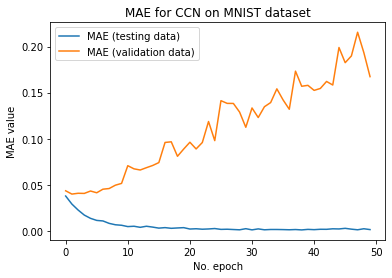

In [13]:
# Plot history: Loss
plt.plot(history.history['loss'], label='MAE (testing data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for CCN on MNIST dataset')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

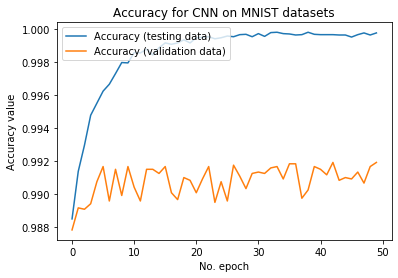

In [14]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [15]:
##### CNN entrainer sur 100 labels ########

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.utils import shuffle

In [48]:
x, y = shuffle(Xtrain, Ytrain, random_state=15)
x_train = x[0:100]
y_train = y[0:100]

In [49]:
model_semi = Sequential()
#add   Conv2D   Activation  MaxPooling2D Dropout 
model_semi.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(32, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model_semi.add(Dropout(0.25))

model_semi.add(Conv2D(64, (3, 3), padding='same'))
model_semi.add(Activation('relu'))
model_semi.add(Conv2D(64, (3, 3)))
model_semi.add(Activation('relu'))
model_semi.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model_semi.add(Flatten())
model_semi.add(Dense(512))
model_semi.add(Activation('relu'))
model_semi.add(Dropout(0.5))
model_semi.add(Dense(10))
model_semi.add(Activation('softmax'))

In [60]:
model_semi.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model_semi.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 0s 4ms/step - loss: 3.3211e-05 - accuracy: 1.0000 - val_loss: 1.6402 - val_accuracy: 0.6500
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 3.0382e-06 - accuracy: 1.0000 - val_loss: 2.0004 - val_accuracy: 0.6500
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 3.4837e-06 - accuracy: 1.0000 - val_loss: 2.3344 - val_accuracy: 0.6000
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 1.4349e-06 - accuracy: 1.0000 - val_loss: 2.6447 - val_accuracy: 0.6000
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 4.5289e-05 - accuracy: 1.0000 - val_loss: 2.6954 - val_accuracy: 0.6000
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 3.3315e-06 - accuracy: 1.0000 - val_loss: 2.7445 - val_accuracy: 0.6000
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 2.3140e-06 - accurac

In [61]:
test_loss, test_acc = model_semi.evaluate(Xtest, Ytest)
test_acc

10000/10000 [==============================] - 3s 262us/step


0.8587999939918518